In [2]:
library(tidyverse)
library(plyr)
library(ggrepel)

In [4]:
code_dir <- getwd()
tool_dir <- unlist(strsplit(code_dir,"/"))
tool_dir <- head(tool_dir, length(tool_dir)-1)
tool_dir <- paste(c(tool_dir, "tools"), collapse="/")
source(file.path(tool_dir, "pl_functions.R"))
base_dir <- gsub("/plotting_codes", "", code_dir)
base_dir


── Column specification ─────────────────────────────────────────────
cols(
  gs_name = col_character(),
  type = col_character(),
  use = col_character(),
  plot_use = col_character(),
  abbr = col_character(),
  order = col_double()
)



── Column specification ─────────────────────────────────────────────
cols(
  gs_name = col_character(),
  gene_symbol = col_character()
)




[1] "/media/pipkin/ROCKET-PRO/CD8_DEV_SC"

In [5]:
exp_name <- "1_IL2RAKO"
analysis_name <- c("0", "all") 

use.path <- file.path(base_dir, '9_Figures', exp_name, 
                      paste(analysis_name, collapse="_"),
                      'volcano_plots')
dir.create(use.path, showWarnings = FALSE, recursive=TRUE)
setwd(use.path)

In [6]:
label.file <- '/media/pipkin/ROCKET-PRO/CD8_DEV_SC/1_IL2RAKO/1_Scanpy/0-all_Scanpy_out/0_sum/1_IL2RAKO_obs_louvainAvg.csv'
label.df <- read_csv(label.file)


── Column specification ─────────────────────────────────────────────
cols(
  louvain = col_double(),
  n_genes = col_double(),
  percent_mito = col_double(),
  n_counts = col_double(),
  dpt_pseudotime = col_double(),
  counts_per_gene = col_double(),
  louvain_new_label = col_character()
)




## 1. In cluster: KO v.s. WT

In [7]:
de.dir <- '/media/pipkin/ROCKET-PRO/CD8_DEV_SC/1_IL2RAKO/1_Scanpy/0-all_Scanpy_out/2_DE/perCluster_KO_vs_WT'

In [8]:
gsea.df <- read_csv('/media/pipkin/ROCKET-PRO/T_cell_signature_Reference/X_GeneSignatures_mm/Exp391_CD8_mm_sigs.csv')
use_path <- "Exp391_CD8---Yao_PRO"
path_name <- "Tstem"
gs.genes <- gsea.df %>% filter(gs_name == use_path) %>% .$gene_symbol


── Column specification ─────────────────────────────────────────────
cols(
  gs_name = col_character(),
  gene_symbol = col_character()
)




In [15]:
read_csv(louvain.de.file)


── Column specification ─────────────────────────────────────────────
cols(
  gene_names = col_character(),
  CD25KO = col_double(),
  CD25WT = col_double(),
  wilcoxon_logfc = col_double(),
  wilcoxon_padj = col_double(),
  wilcoxon_score = col_double(),
  `t-test_logfc` = col_double(),
  `t-test_padj` = col_double(),
  `t-test_score` = col_double(),
  `t-test_overestim_var_logfc` = col_double(),
  `t-test_overestim_var_padj` = col_double(),
  `t-test_overestim_var_score` = col_double()
)




gene_names,CD25KO,CD25WT,wilcoxon_logfc,wilcoxon_padj,wilcoxon_score,t-test_logfc,t-test_padj,t-test_score,t-test_overestim_var_logfc,t-test_overestim_var_padj,t-test_overestim_var_score
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mrpl15,0.61901075,0.56347865,0.17958583,0.9765057,1.28150690,0.17958583,1.0000000,0.47691876,0.17958583,1,0.44134706
Lypla1,0.55184323,0.46987405,0.29612517,0.9765057,1.25247610,0.29612517,1.0000000,0.73890620,0.29612517,1,0.69928569
Tcea1,0.50239718,0.56244451,-0.21002285,0.9952475,0.01658909,-0.21002285,1.0000000,-0.51317960,-0.21002285,1,-0.47328433
Atp6v1h,0.21416712,0.26378047,-0.33781311,0.9848758,0.05391453,-0.33781311,1.0000000,-0.60537815,-0.33781311,1,-0.55585039
Rb1cc1,0.22926411,0.17493950,0.43066058,0.9765057,0.88751614,0.43066058,1.0000000,0.67746335,0.43066058,1,0.63559502
4732440D04Rik,0.01497922,0.05659699,-1.94796276,0.9848758,-0.07465089,-1.94796276,0.9889729,-1.28383064,-1.94796276,1,-1.13963759
Pcmtd1,0.12661673,0.17809319,-0.53023934,0.9848758,-0.04976726,-0.53023934,1.0000000,-0.70383674,-0.53023934,1,-0.64731872
Gm26901,0.00000000,0.00000000,0.00000000,0.9765057,0.37325445,0.00000000,1.0000000,0.00000000,0.00000000,1,0.00000000
Rrs1,0.18804845,0.23419558,-0.35106793,0.9848758,-0.10782906,-0.35106793,1.0000000,-0.58916676,-0.35106793,1,-0.54475695


In [17]:
for (i in c(1:7)) {
    cluster <- c(paste("P", as.character(i), sep=""))
    cluster_oldname <- cvt_names(cluster, label.df$louvain_new_label, label.df$louvain)
    cluster_oldname <- as.character(cluster_oldname)

    cp_oldnames <- c("CD25KO", "CD25WT")
    cp <- c("KO", "WT")

    ###----- Setup
    outname.base <- paste(cluster, cp[1], "vs", cp[2], sep="_")
    
    use.genes <- c("Tbx21", "Il2ra", "Batf", "Tox", "Bach2", "Tcf7", "Tox","Batf3", "Klrg1", "Sell", "Cd127")
    log2fc.c <- 1
    nlog10p.c <- 1.3
    gs.vec <- c( "Tstem")
    gs.col.vec <- c("black")
    log2fc.range <- c(-6,6)
    nlog10pval.max <- 6
    
    path_name <- paste(gs.vec <- c("TE up", "Tstem"), collapse="_")
    path_name <- gsub(" ", "-", path_name)
    outname.base <- paste(outname.base, path_name, sep="_")

    ###----- Plot
    # Read input
    louvain.de.file <- paste(cp_oldnames[1], "vs", cp_oldnames[2], "differential.csv", sep="_")
    louvain.de.file <- file.path(de.dir, cluster_oldname,file.path(cp_oldnames[1], louvain.de.file))
    de.df <- read_csv(louvain.de.file)
    # Filter out low expression & convert df for plotting
    de.df <- de.df %>% filter( ! gene_names %in% c("Xist", "Tsix", "Eif2s3y", "Ddx3y"))  
    de.df <- de.df %>%
      mutate(max_expr = pmax(pull(de.df, cp_oldnames[1]), pull(de.df, cp_oldnames[2]))) %>% 
      filter(max_expr > 0.15) %>% 
      drop_na() %>% select(one_of('gene_names', 't-test_logfc', 't-test_padj'))
    colnames(de.df) <- c("gene_name", "log2fc", "padj")
    de.df$nlog10pval <- -log10(de.df$padj)
    # Plot
    vol_plot_out <- volcano_plot_highlightGSEA(de.df, use.genes, gs.vec, gs.col.vec, 
                                           log2fc.c, nlog10p.c, log2fc.range, nlog10pval.max) # With label
    vol_plot <- vol_plot_out$labeled_plot
    ggsave(paste(outname.base, ".png", sep=""), vol_plot, device='png', width=10, height=10, units='cm')
    # Save simplified plot
    vol_plot <- vol_plot_out$plot
    ggsave(paste(outname.base, "_nolabel.png", sep=""), vol_plot, device='png', width=10, height=10, units='cm')
}


── Column specification ─────────────────────────────────────────────
cols(
  gene_names = col_character(),
  CD25KO = col_double(),
  CD25WT = col_double(),
  wilcoxon_logfc = col_double(),
  wilcoxon_padj = col_double(),
  wilcoxon_score = col_double(),
  `t-test_logfc` = col_double(),
  `t-test_padj` = col_double(),
  `t-test_score` = col_double(),
  `t-test_overestim_var_logfc` = col_double(),
  `t-test_overestim_var_padj` = col_double(),
  `t-test_overestim_var_score` = col_double()
)




  side TE up Tstem
1   up     0     0
2   dn     0     0


Warning message:
“Removed 44 rows containing missing values (geom_point).”
Warning message:
“Removed 44 rows containing missing values (geom_point).”

── Column specification ─────────────────────────────────────────────
cols(
  gene_names = col_character(),
  CD25KO = col_double(),
  CD25WT = col_double(),
  wilcoxon_logfc = col_double(),
  wilcoxon_padj = col_double(),
  wilcoxon_score = col_double(),
  `t-test_logfc` = col_double(),
  `t-test_padj` = col_double(),
  `t-test_score` = col_double(),
  `t-test_overestim_var_logfc` = col_double(),
  `t-test_overestim_var_padj` = col_double(),
  `t-test_overestim_var_score` = col_double()
)




  side TE up Tstem
1   up     0     0
2   dn     2     0


Warning message:
“Removed 40 rows containing missing values (geom_point).”
Warning message:
“Removed 40 rows containing missing values (geom_point).”

── Column specification ─────────────────────────────────────────────
cols(
  gene_names = col_character(),
  CD25KO = col_double(),
  CD25WT = col_double(),
  wilcoxon_logfc = col_double(),
  wilcoxon_padj = col_double(),
  wilcoxon_score = col_double(),
  `t-test_logfc` = col_double(),
  `t-test_padj` = col_double(),
  `t-test_score` = col_double(),
  `t-test_overestim_var_logfc` = col_double(),
  `t-test_overestim_var_padj` = col_double(),
  `t-test_overestim_var_score` = col_double()
)




  side TE up Tstem
1   up     0     0
2   dn     0     0


Warning message:
“Removed 53 rows containing missing values (geom_point).”
Warning message:
“Removed 53 rows containing missing values (geom_point).”

── Column specification ─────────────────────────────────────────────
cols(
  gene_names = col_character(),
  CD25KO = col_double(),
  CD25WT = col_double(),
  wilcoxon_logfc = col_double(),
  wilcoxon_padj = col_double(),
  wilcoxon_score = col_double(),
  `t-test_logfc` = col_double(),
  `t-test_padj` = col_double(),
  `t-test_score` = col_double(),
  `t-test_overestim_var_logfc` = col_double(),
  `t-test_overestim_var_padj` = col_double(),
  `t-test_overestim_var_score` = col_double()
)




  side TE up Tstem
1   up     0     0
2   dn     0     0


Warning message:
“Removed 22 rows containing missing values (geom_point).”
Warning message:
“Removed 22 rows containing missing values (geom_point).”

── Column specification ─────────────────────────────────────────────
cols(
  gene_names = col_character(),
  CD25KO = col_double(),
  CD25WT = col_double(),
  wilcoxon_logfc = col_double(),
  wilcoxon_padj = col_double(),
  wilcoxon_score = col_double(),
  `t-test_logfc` = col_double(),
  `t-test_padj` = col_double(),
  `t-test_score` = col_double(),
  `t-test_overestim_var_logfc` = col_double(),
  `t-test_overestim_var_padj` = col_double(),
  `t-test_overestim_var_score` = col_double()
)




  side TE up Tstem
1   up     0     0
2   dn     0     0


Warning message:
“Removed 19 rows containing missing values (geom_point).”
Warning message:
“Removed 19 rows containing missing values (geom_point).”

── Column specification ─────────────────────────────────────────────
cols(
  gene_names = col_character(),
  CD25KO = col_double(),
  CD25WT = col_double(),
  wilcoxon_logfc = col_double(),
  wilcoxon_padj = col_double(),
  wilcoxon_score = col_double(),
  `t-test_logfc` = col_double(),
  `t-test_padj` = col_double(),
  `t-test_score` = col_double(),
  `t-test_overestim_var_logfc` = col_double(),
  `t-test_overestim_var_padj` = col_double(),
  `t-test_overestim_var_score` = col_double()
)




  side TE up Tstem
1   up     0     0
2   dn     0     0


Warning message:
“Removed 28 rows containing missing values (geom_point).”
Warning message:
“Removed 28 rows containing missing values (geom_point).”

── Column specification ─────────────────────────────────────────────
cols(
  gene_names = col_character(),
  CD25KO = col_double(),
  CD25WT = col_double(),
  wilcoxon_logfc = col_double(),
  wilcoxon_padj = col_double(),
  wilcoxon_score = col_double(),
  `t-test_logfc` = col_double(),
  `t-test_padj` = col_double(),
  `t-test_score` = col_double(),
  `t-test_overestim_var_logfc` = col_double(),
  `t-test_overestim_var_padj` = col_double(),
  `t-test_overestim_var_score` = col_double()
)




  side TE up Tstem
1   up     0     0
2   dn     0     0


Warning message:
“Removed 23 rows containing missing values (geom_point).”
Warning message:
“Removed 23 rows containing missing values (geom_point).”


## 2. Between clusters

In [9]:
de.dir <- '/media/pipkin/ROCKET-PRO/CD8_DEV_SC/1_IL2RAKO/1_Scanpy/0-all_Scanpy_out/2_DE/Cluster_vs_Cluster'


── Column specification ───────────────────────────────────────────────────────
cols(
  gene_names = col_character(),
  `1` = col_double(),
  `9` = col_double(),
  wilcoxon_logfc = col_double(),
  wilcoxon_padj = col_double(),
  wilcoxon_score = col_double(),
  `t-test_logfc` = col_double(),
  `t-test_padj` = col_double(),
  `t-test_score` = col_double(),
  `t-test_overestim_var_logfc` = col_double(),
  `t-test_overestim_var_padj` = col_double(),
  `t-test_overestim_var_score` = col_double()
)




  side TE up Tstem
1   up    18     4
2   dn     0    24


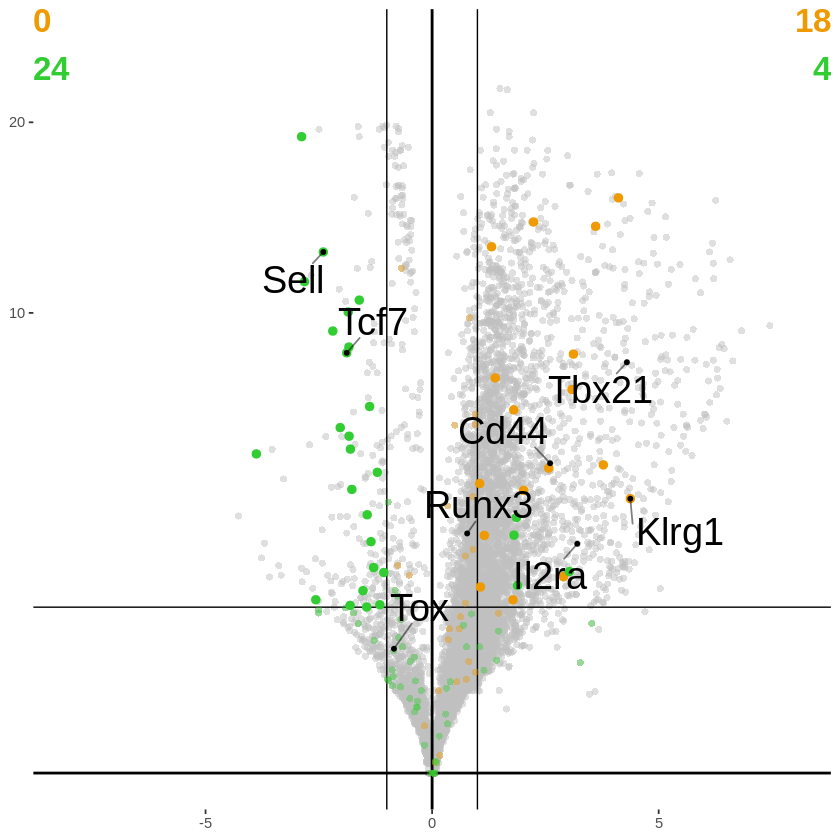

In [18]:
cp <- c("P2", "P1")
cp_oldnames <- cvt_names(cp, label.df$louvain_new_label, label.df$louvain)
cp_oldnames <- as.character(cp_oldnames)

###----- Setup
outname.base <- paste("All", cp[1], "vs", cp[2], sep="_")
use.genes <- c("Tbx21", "Il2ra", "Batf3", "Runx3", "Tcf7", "Tox", 
               "Sell", "Cd44", "Klrg1")
log2fc.c <- 1
nlog10p.c <- 1.3
gs.vec <- c("TE up", "Tstem")
gs.col.vec <- c("orange2", "limegreen")

###----- Plot
# Read input
louvain.de.file <- paste(cp_oldnames[1], "vs", cp_oldnames[2], "differential.csv", sep="_")
louvain.de.file <- file.path(de.dir, file.path(cp_oldnames[1], louvain.de.file))
de.df <- read_csv(louvain.de.file)
# Filter out low expression & convert df for plotting
de.df <- de.df %>% 
  mutate(max_expr = pmax(unlist(de.df[cp_oldnames[1]]), unlist(de.df[cp_oldnames[2]]))) %>% filter(max_expr > 0.05) %>%
  drop_na() %>% select(one_of('gene_names', 't-test_logfc', 't-test_padj'))
colnames(de.df) <- c("gene_name", "log2fc", "padj")
de.df$nlog10pval <- -log10(de.df$padj)
# Plot
vol_plot_out <- volcano_plot_highlightGSEA(de.df, use.genes, gs.vec, gs.col.vec,
                                           log2fc.c, nlog10p.c, c(-8,8), 25) # With label

vol_plot <- vol_plot_out$labeled_plot
vol_plot
ggsave(paste(outname.base, ".png", sep=""), vol_plot, device='png', width=10, height=10, units='cm')

# Save simplified plot
vol_plot <- vol_plot_out$plot
ggsave(paste(outname.base, "_nolabel.png", sep=""), vol_plot, device='png', width=10, height=10, units='cm')


── Column specification ────────────────────────────────────────────
cols(
  gene_names = col_character(),
  `8` = col_double(),
  `9` = col_double(),
  wilcoxon_logfc = col_double(),
  wilcoxon_padj = col_double(),
  wilcoxon_score = col_double(),
  `t-test_logfc` = col_double(),
  `t-test_padj` = col_double(),
  `t-test_score` = col_double(),
  `t-test_overestim_var_logfc` = col_double(),
  `t-test_overestim_var_padj` = col_double(),
  `t-test_overestim_var_score` = col_double()
)




  side TE up Tstem
1   up     1     0
2   dn     0     8


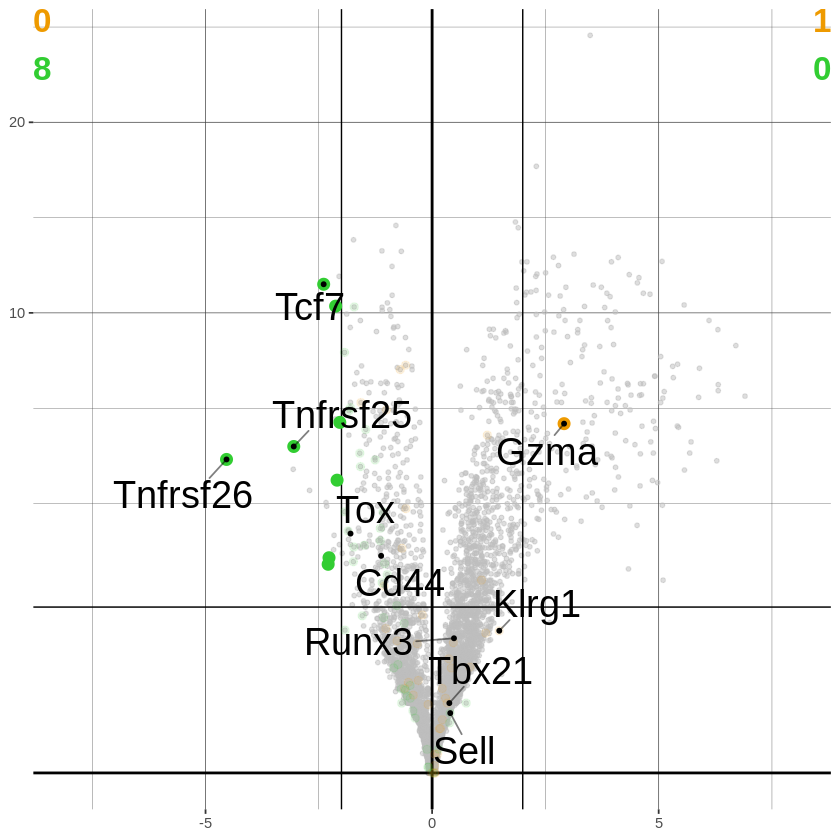

In [29]:
cp <- c("P2", "P3")
cp_oldnames <- cvt_names(cp, label.df$louvain_new_label, label.df$louvain)
cp_oldnames <- as.character(cp_oldnames)

###----- Setup
outname.base <- paste("All", cp[1], "vs", cp[2], sep="_")
use.genes <- c("Tbx21", "Il2ra", "Batf3", "Runx3", "Tcf7", "Tox", "Sell", "Cd44", "Klrg1")
log2fc.c <- 2
nlog10p.c <- 1.3
gs.vec <- c("TE up", "Tstem")
gs.col.vec <- c("orange2", "limegreen")

###----- Plot
# Read input
louvain.de.file <- paste(cp_oldnames[1], "vs", cp_oldnames[2], "differential.csv", sep="_")
louvain.de.file <- file.path(de.dir, file.path(cp_oldnames[1], louvain.de.file))
de.df <- read_csv(louvain.de.file)
# Filter out low expression & convert df for plotting
de.df <- de.df %>% 
  mutate(max_expr = pmax(unlist(de.df[cp_oldnames[1]]), unlist(de.df[cp_oldnames[2]]))) %>% filter(max_expr > 0.15) %>%
  drop_na() %>% select(one_of('gene_names', 't-test_logfc', 't-test_padj'))
colnames(de.df) <- c("gene_name", "log2fc", "padj")
de.df$nlog10pval <- -log10(de.df$padj)
# Plot
vol_plot_out <- volcano_plot_highlightGSEA(de.df, use.genes, gs.vec, gs.col.vec,
                                           log2fc.c, nlog10p.c, c(-8,8), 25) # With label
vol_plot <- vol_plot_out$plot
vol_plot
vol_plot <- vol_plot + theme(axis.text.x=element_blank(), axis.text.y=element_blank()) # Without label
ggsave(paste(outname.base, "_nolabel.png", sep=""), vol_plot, device='png', width=10, height=10, units='cm')


── Column specification ────────────────────────────────────────────
cols(
  gene_names = col_character(),
  `4` = col_double(),
  `9` = col_double(),
  wilcoxon_logfc = col_double(),
  wilcoxon_padj = col_double(),
  wilcoxon_score = col_double(),
  `t-test_logfc` = col_double(),
  `t-test_padj` = col_double(),
  `t-test_score` = col_double(),
  `t-test_overestim_var_logfc` = col_double(),
  `t-test_overestim_var_padj` = col_double(),
  `t-test_overestim_var_score` = col_double()
)




  side TE up Tstem
1   up     0     6
2   dn     2     0


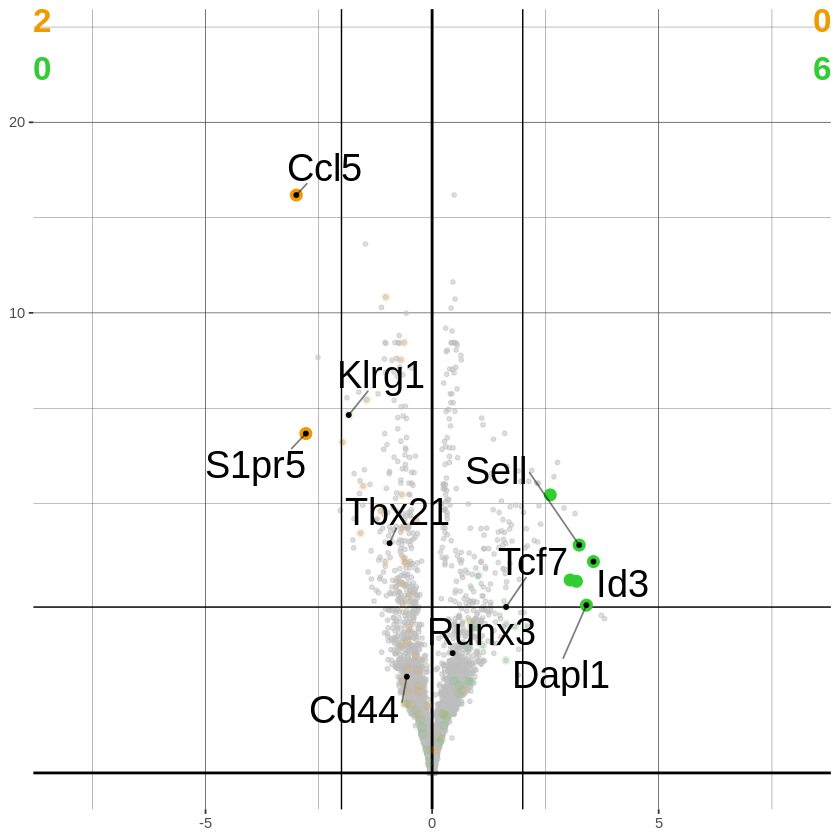

In [30]:
cp <- c("P2", "P4")
cp_oldnames <- cvt_names(cp, label.df$louvain_new_label, label.df$louvain)
cp_oldnames <- as.character(cp_oldnames)

###----- Setup
outname.base <- paste("All", cp[1], "vs", cp[2], sep="_")
use.genes <- c("Tbx21", "Il2ra", "Batf3", "Runx3", "Tcf7", "Tox", "Sell", "Cd44", "Klrg1")
log2fc.c <- 2
nlog10p.c <- 1.3
gs.vec <- c("TE up", "Tstem")
gs.col.vec <- c("orange2", "limegreen")

###----- Plot
# Read input
louvain.de.file <- paste(cp_oldnames[1], "vs", cp_oldnames[2], "differential.csv", sep="_")
louvain.de.file <- file.path(de.dir, file.path(cp_oldnames[1], louvain.de.file))
de.df <- read_csv(louvain.de.file)
# Filter out low expression & convert df for plotting
de.df <- de.df %>% 
  mutate(max_expr = pmax(unlist(de.df[cp_oldnames[1]]), unlist(de.df[cp_oldnames[2]]))) %>% filter(max_expr > 0.15) %>%
  drop_na() %>% select(one_of('gene_names', 't-test_logfc', 't-test_padj'))
colnames(de.df) <- c("gene_name", "log2fc", "padj")
de.df$nlog10pval <- -log10(de.df$padj)
# Plot
vol_plot_out <- volcano_plot_highlightGSEA(de.df, use.genes, gs.vec, gs.col.vec,
                                           log2fc.c, nlog10p.c, c(-8,8), 25) # With label
vol_plot <- vol_plot_out$plot
vol_plot
vol_plot <- vol_plot + theme(axis.text.x=element_blank(), axis.text.y=element_blank()) # Without label
ggsave(paste(outname.base, "_nolabel.png", sep=""), vol_plot, device='png', width=10, height=10, units='cm')


── Column specification ────────────────────────────────────────────
cols(
  gene_names = col_character(),
  `3` = col_double(),
  `9` = col_double(),
  wilcoxon_logfc = col_double(),
  wilcoxon_padj = col_double(),
  wilcoxon_score = col_double(),
  `t-test_logfc` = col_double(),
  `t-test_padj` = col_double(),
  `t-test_score` = col_double(),
  `t-test_overestim_var_logfc` = col_double(),
  `t-test_overestim_var_padj` = col_double(),
  `t-test_overestim_var_score` = col_double()
)




  side TE up Tstem
1   up     0     8
2   dn     5     0


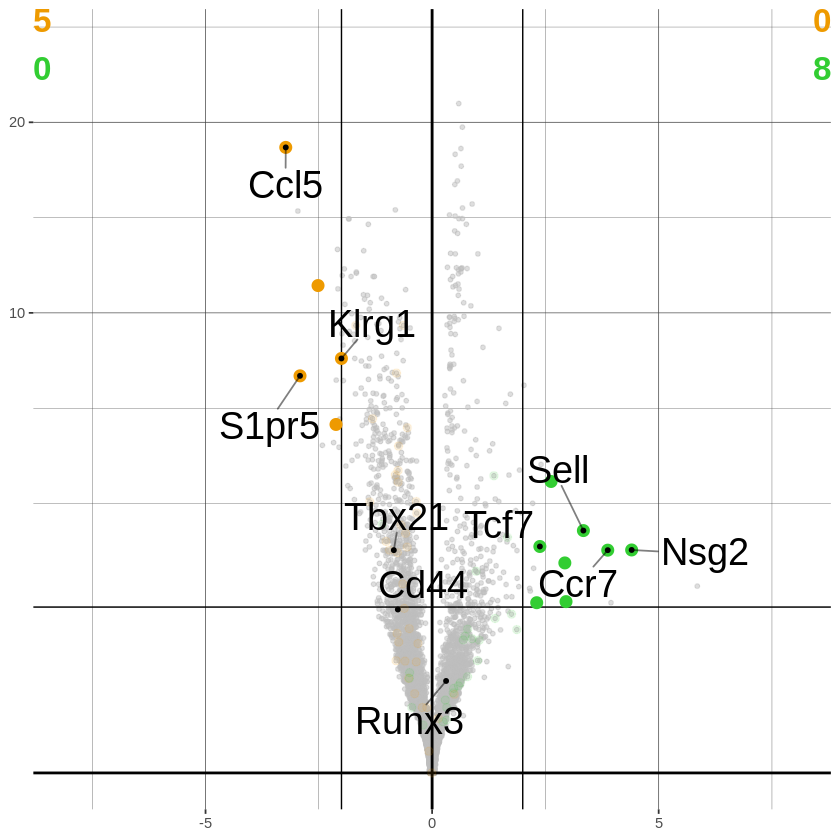

In [31]:
cp <- c("P2", "P5")
cp_oldnames <- cvt_names(cp, label.df$louvain_new_label, label.df$louvain)
cp_oldnames <- as.character(cp_oldnames)

###----- Setup
outname.base <- paste("All", cp[1], "vs", cp[2], sep="_")
use.genes <- c("Tbx21", "Il2ra", "Batf3", "Runx3", "Tcf7", "Tox", "Sell", "Cd44", "Klrg1")
log2fc.c <- 2
nlog10p.c <- 1.3
gs.vec <- c("TE up", "Tstem")
gs.col.vec <- c("orange2", "limegreen")

###----- Plot
# Read input
louvain.de.file <- paste(cp_oldnames[1], "vs", cp_oldnames[2], "differential.csv", sep="_")
louvain.de.file <- file.path(de.dir, file.path(cp_oldnames[1], louvain.de.file))
de.df <- read_csv(louvain.de.file)
# Filter out low expression & convert df for plotting
de.df <- de.df %>% 
  mutate(max_expr = pmax(unlist(de.df[cp_oldnames[1]]), unlist(de.df[cp_oldnames[2]]))) %>% filter(max_expr > 0.15) %>%
  drop_na() %>% select(one_of('gene_names', 't-test_logfc', 't-test_padj'))
colnames(de.df) <- c("gene_name", "log2fc", "padj")
de.df$nlog10pval <- -log10(de.df$padj)
# Plot
vol_plot_out <- volcano_plot_highlightGSEA(de.df, use.genes, gs.vec, gs.col.vec,
                                           log2fc.c, nlog10p.c, c(-8,8), 25) # With label
vol_plot <- vol_plot_out$plot
vol_plot
vol_plot <- vol_plot + theme(axis.text.x=element_blank(), axis.text.y=element_blank()) # Without label
ggsave(paste(outname.base, "_nolabel.png", sep=""), vol_plot, device='png', width=10, height=10, units='cm')